# Run a Simulation on Testing Data

In [1]:
from io import BytesIO
import boto3
import datetime
import multiprocessing as mp
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%run src/columns.py
%run src/data-cleaning.py
%run src/feature-engineering.py
%run src/modeling.py
%run src/payments.py
%run src/portfolio.py

In [2]:
payments = pd.read_pickle('data/df_payments_data_all_cleaned.pkl.bz2', compression='bz2')

In [4]:
payments.tail()

RECEIVED_AMT_INVESTORS  PBAL_END_PERIOD_INVESTORS  \
RECEIVED_D LOAN_ID                                                        
2019-04-01 145643149              568.580017               24095.798828   
           145644144              264.959991                7435.606445   
           145645132              387.489990               10271.670898   
           145645185              595.020020               24143.052734   
           145645206              299.429993                7937.182617   

                      mths_since_issue  
RECEIVED_D LOAN_ID                      
2019-04-01 145643149                 4  
           145644144                 4  
           145645132                 4  
           145645185                 4  
           145645206                 4

In [5]:
payments.head()

RECEIVED_AMT_INVESTORS  PBAL_END_PERIOD_INVESTORS  \
RECEIVED_D LOAN_ID                                                      
2007-07-01 72176                  7.189307                 219.559830   
           73582                  7.289357                 219.637436   
           74505                  7.256250                 219.611313   
           77792                  3.975833                 121.962997   
           81085                  9.032310                 268.539795   

                    mths_since_issue  
RECEIVED_D LOAN_ID                    
2007-07-01 72176                   1  
           73582                   1  
           74505                   1  
           77792                   1  
           81085                   1

In [15]:
predictions_xgb = pd.read_pickle('data/model_xgb_predictions.pkl.bz2')
predictions_rf_10 = pd.read_pickle('data/model_rf_10_trees_predictions.pkl.bz2')
predictions_rf_100 = pd.read_pickle('data/model_rf_100_trees_predictions.pkl.bz2')
predictions_dt = pd.read_pickle('data/model_dt_predictions.pkl.bz2')
predictions_naive_high = pd.read_pickle('data/model_naive_high.pkl.bz2')
predictions_naive_low = pd.read_pickle('data/model_naive_low.pkl.bz2')

#### Try Simulations with Various Min ROI Values

In [23]:
min_rois = np.linspace(6, 11, num = 51)
min_rois

array([ 6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ])

In [24]:
rois = []
balances = []

for roi in min_rois:
    myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_xgb, payments, min_roi=roi)
    while myPortfolio.date < datetime.date(2019,1,1):
        myPortfolio.simulate_month()
    rois.append(roi)
    balances.append(myPortfolio.total_balance)

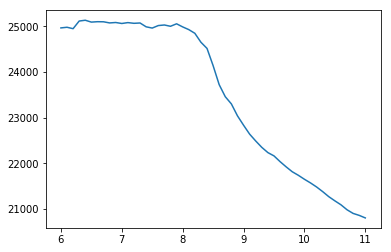

In [29]:
sns.lineplot(x=rois, y=balances)

#### Create a Portfolio

In [18]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_xgb, payments, min_roi=8)

In [71]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_xgb, payments, min_roi=8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [73]:
balances_xgb = balances

In [74]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_rf_10, payments, min_roi=8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [75]:
balances_rf_10 = balances

In [77]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_rf_100, payments, min_roi=8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [78]:
balances_rf_100 = balances

In [81]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_dt, payments, min_roi=8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [82]:
balances_dt = balances

In [84]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_naive_high, payments, min_roi=8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [85]:
balances_naive_high = balances

In [87]:
myPortfolio = Portfolio(20000, 25, datetime.date(2016,5,1), predictions_naive_low, payments, min_roi=-8)
simulation_month = 0
months = []
balances = []
while myPortfolio.date < datetime.date(2019,1,1):
    months.append(myPortfolio.date)
    myPortfolio.simulate_month()
    balances.append(myPortfolio.total_balance)

In [88]:
balances_naive_low = balances

In [93]:
portfolio_values = pd.DataFrame(index=months, data=balances_dt)
portfolio_values.rename(columns={0:'dt'}, inplace=True)
portfolio_values['xgb'] = balances_xgb
portfolio_values['rf_10'] = balances_rf_10
portfolio_values['naive_high'] = balances_naive_high
portfolio_values['rf_100'] = balances_rf_100
portfolio_values['naive_low'] = balances_naive_low
portfolio_values.head()

,dt,xgb,rf_10,naive_high,rf_100,naive_low
2016-05-01,20000.869078,20000.033167,20001.920675,20000.523329,20001.419106,20000.890676
2016-06-01,20296.404896,20009.521438,20224.909506,20346.290093,20131.050269,20080.002662
2016-07-01,20608.227561,20035.018921,20468.043165,20711.070125,20330.401202,20162.031223
2016-08-01,20927.694348,20086.027061,20720.951116,21094.494842,20547.881609,20247.732791
2016-09-01,21246.781915,20173.328591,20986.127745,21490.025329,20776.386093,20334.600915


In [94]:
portfolio_values

,dt,xgb,rf_10,naive_high,rf_100,naive_low
2016-05-01,20000.869078,20000.033167,20001.920675,20000.523329,20001.419106,20000.890676
2016-06-01,20296.404896,20009.521438,20224.909506,20346.290093,20131.050269,20080.002662
2016-07-01,20608.227561,20035.018921,20468.043165,20711.070125,20330.401202,20162.031223
2016-08-01,20927.694348,20086.027061,20720.951116,21094.494842,20547.881609,20247.732791
2016-09-01,21246.781915,20173.328591,20986.127745,21490.025329,20776.386093,20334.600915
2016-10-01,21465.515193,20277.795094,21185.829780,21710.340563,20969.430167,20416.701041
2016-11-01,21595.332869,20377.790092,21321.536618,21753.689940,21100.809863,20496.544443
2016-12-01,21718.854605,20542.527795,21393.261010,21883.505601,21275.461717,20570.074988
2017-01-01,21744.608068,20719.004085,21421.784544,21795.638867,21458.169347,20652.722454
2017-02-01,21778.864381,20894.379172,21405.006578,21772.287599,21568.788820,20712.895230


In [103]:
portfolio_values.to_pickle('data/df_simulation_results.pkl.bz2', compression='bz2')

In [95]:
balances_xgb

[20000.033166503905,
 20009.521438261945,
 20035.018921186092,
 20086.027060938388,
 20173.32859077058,
 20277.795094009605,
 20377.790092234867,
 20542.52779457346,
 20719.004084728054,
 20894.379171806497,
 21081.319559215146,
 21227.404362652993,
 21421.270497955746,
 21629.896602615427,
 21794.200171036548,
 22003.709157982157,
 22162.10877245652,
 22255.307394043928,
 22428.24089923559,
 22565.872376458185,
 22712.515890117767,
 22892.108781355684,
 23059.1314836988,
 23242.158244344246,
 23410.26550388882,
 23585.97696968408,
 23821.618881457092,
 24030.962305671343,
 24218.687068797797,
 24481.904623984927,
 24749.662194241602,
 24990.050880295454]

In [96]:
balances_dt

[20000.86907786138,
 20296.404895827643,
 20608.227560760337,
 20927.694348428922,
 21246.78191456405,
 21465.515193065236,
 21595.332868699632,
 21718.854605045766,
 21744.608068381218,
 21778.864380670366,
 21784.659687146683,
 21690.918838953636,
 21685.554798877653,
 21764.363563728737,
 21659.865463460734,
 21657.636598013956,
 21666.727575976514,
 21767.585440403207,
 21709.750686407388,
 21686.797101727137,
 21710.893060871604,
 21697.859228183224,
 21740.280701159543,
 21825.563407094374,
 21903.084355499792,
 22000.924413756995,
 22119.214935499203,
 22241.58077375791,
 22284.629397455392,
 22385.474289108748,
 22429.393940200946,
 22463.549189621142]

In [98]:
balances_naive_high

[20000.523328523588,
 20346.290092822674,
 20711.070124838145,
 21094.494842191714,
 21490.02532940061,
 21710.340563303806,
 21753.689940148222,
 21883.505600859473,
 21795.638866627538,
 21772.287598624036,
 21670.630428314566,
 21581.547875605625,
 21458.42345413198,
 21546.180300490716,
 21434.993299434114,
 21231.52059150959,
 21150.32395373565,
 21037.77509531485,
 21025.82801960376,
 21023.397691727958,
 20745.572344605323,
 20341.673044109644,
 20221.020994119375,
 20173.57400249928,
 20078.94891779404,
 20022.768231604718,
 19933.97924144426,
 19995.41420338805,
 19965.21662623116,
 20048.955621853966,
 20085.325699503752,
 20118.186492071633]

In [99]:
balances_naive_low

[20000.89067647682,
 20080.002662285944,
 20162.031222858106,
 20247.73279139305,
 20334.600915368042,
 20416.701040715107,
 20496.544442938066,
 20570.074987693777,
 20652.722454143423,
 20712.895230015154,
 20811.7951402049,
 20866.15613954601,
 20933.832324389696,
 21029.878974836633,
 21056.074801176073,
 21112.518063504252,
 21178.4404129212,
 21268.444761524795,
 21342.221470804165,
 21367.92160118246,
 21456.196349387123,
 21502.26380367933,
 21540.955326148753,
 21608.21587725574,
 21664.065508328476,
 21757.641751595544,
 21796.313043971306,
 21850.854672102698,
 21909.25883497425,
 21972.975824891564,
 22069.928723674948,
 22156.33596058522]

In [100]:
balances_rf_10

[20001.920675319645,
 20224.90950551136,
 20468.043164880364,
 20720.95111558958,
 20986.1277446812,
 21185.829780471882,
 21321.536618003975,
 21393.26100993126,
 21421.78454410939,
 21405.006577754346,
 21565.732132091813,
 21558.309749936852,
 21718.74007987743,
 21827.40571780169,
 21862.859779841696,
 22041.750471337422,
 22127.046535243073,
 22152.681413956005,
 22240.891278209358,
 22185.38754601703,
 22294.681768405506,
 22293.702376754933,
 22477.72781121327,
 22631.599226531787,
 22836.402337762847,
 23037.250765871235,
 23080.947637803623,
 23314.577567214197,
 23429.292204896476,
 23547.98261223262,
 23676.76400377465,
 23706.952555350097]

In [101]:
balances_rf_100

[20001.419105936995,
 20131.050269422893,
 20330.40120157252,
 20547.881609180207,
 20776.386092572335,
 20969.430166704573,
 21100.809863089726,
 21275.461716583435,
 21458.169346625484,
 21568.788820306916,
 21771.966096975157,
 21867.398114690237,
 21987.047190224657,
 22147.059220723037,
 22269.972029560704,
 22459.255843045277,
 22437.39830978378,
 22587.74947218204,
 22748.67832420003,
 22895.763869002585,
 23109.467347539765,
 23228.800948302392,
 23539.097086453192,
 23733.868151491937,
 23926.12755336972,
 24157.384861943945,
 24390.24396418562,
 24634.231233788538,
 24809.20315048951,
 25042.946369675323,
 25277.930396081727,
 25454.990244149936]

In [102]:
balances_xgb

[20000.033166503905,
 20009.521438261945,
 20035.018921186092,
 20086.027060938388,
 20173.32859077058,
 20277.795094009605,
 20377.790092234867,
 20542.52779457346,
 20719.004084728054,
 20894.379171806497,
 21081.319559215146,
 21227.404362652993,
 21421.270497955746,
 21629.896602615427,
 21794.200171036548,
 22003.709157982157,
 22162.10877245652,
 22255.307394043928,
 22428.24089923559,
 22565.872376458185,
 22712.515890117767,
 22892.108781355684,
 23059.1314836988,
 23242.158244344246,
 23410.26550388882,
 23585.97696968408,
 23821.618881457092,
 24030.962305671343,
 24218.687068797797,
 24481.904623984927,
 24749.662194241602,
 24990.050880295454]